# W09 - Class Assignment
Evelin Alim Natadjaja
0706022310021

## Import Library

In [319]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

## Data Preprocessing

In [320]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [321]:
# rename the columns
df = df.rename(columns={"Luas Tanah (m2)": "Luas Tanah", "Luas Bangunan (m2)": "Luas Bangunan", "Harga Penawaran (dari Owner)": "Harga Penawaran", "Lebar Jalan Depan Rumah (ROW)": "Lebar Jalan Depan Rumah"})
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [322]:
# describe data
df.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [323]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Area Category            308 non-null    object
 1   Nama Daerah              308 non-null    object
 2   Luas Tanah               308 non-null    int64 
 3   Luas Bangunan            308 non-null    int64 
 4   Jumlah Kamar             308 non-null    int64 
 5   Jumlah Kamar Mandi       308 non-null    int64 
 6   Tingkat/Lantai           308 non-null    int64 
 7   Harga Penawaran          308 non-null    int64 
 8   Terjual/Belum            308 non-null    object
 9   Arah Hadap Rumah         308 non-null    object
 10  Posisi Rumah             308 non-null    object
 11  Lebar Jalan Depan Rumah  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [324]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Area Category': array(['Standard', 'Below Standard', 'Sangat Premium', 'Premium'],
       dtype=object),
 'Nama Daerah': array(['Citraland', 'Setro Baru Utara', 'Kenjeran', 'Gubeng', 'Sawahan',
        'Mulyorejo', 'Tegalsari', 'Tambaksari', 'Kalilom Lor Timur',
        'Jelidro Manukan', 'Kalilom', 'Bulak Cumpat barat', 'Tambak Wedi',
        'Lebak Jaya', 'Simo Gunung Kramat Timur', 'Medokan Ayu',
        'Lebak Rejo', 'Medokan Sawah', 'Klampis Ngasem',
        'Medokan Sawah Timur', 'Citraland Golf Avenue', 'Wisata Semanggi',
        'Kedung Klinter', 'Gading Indah Regency', 'Gunung Anyar Mas',
        'Kutisari Utara', 'Mulyosari Tengah', 'Kapas Madya',
        'Bratang Gede', 'Citraland Utara', 'Lebak Jaya Utara',
        'Mulyosari Timur', 'Pakuwon City', 'Pakuwon city',
        'Pakuwon City Florence', 'Pantai Mentari', 'Royal Residence',
        'Villa Kalijudan Indah', 'Sutorejo Timur', 'Springville Residence',
        'Sukomanunggal', 'Surabaya Pusat', 'Su', 'Mulyosari',
  

In [325]:
#drop kolom terjual/belum karena memiliki value yang sama utk setiap row
df = df.drop('Terjual/Belum', axis=1)

In [326]:
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,Standard,Citraland,240,300,4,3,2,3500000000,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Barat,Standard,1-2 Mobil


## Exploratory Data Analysis

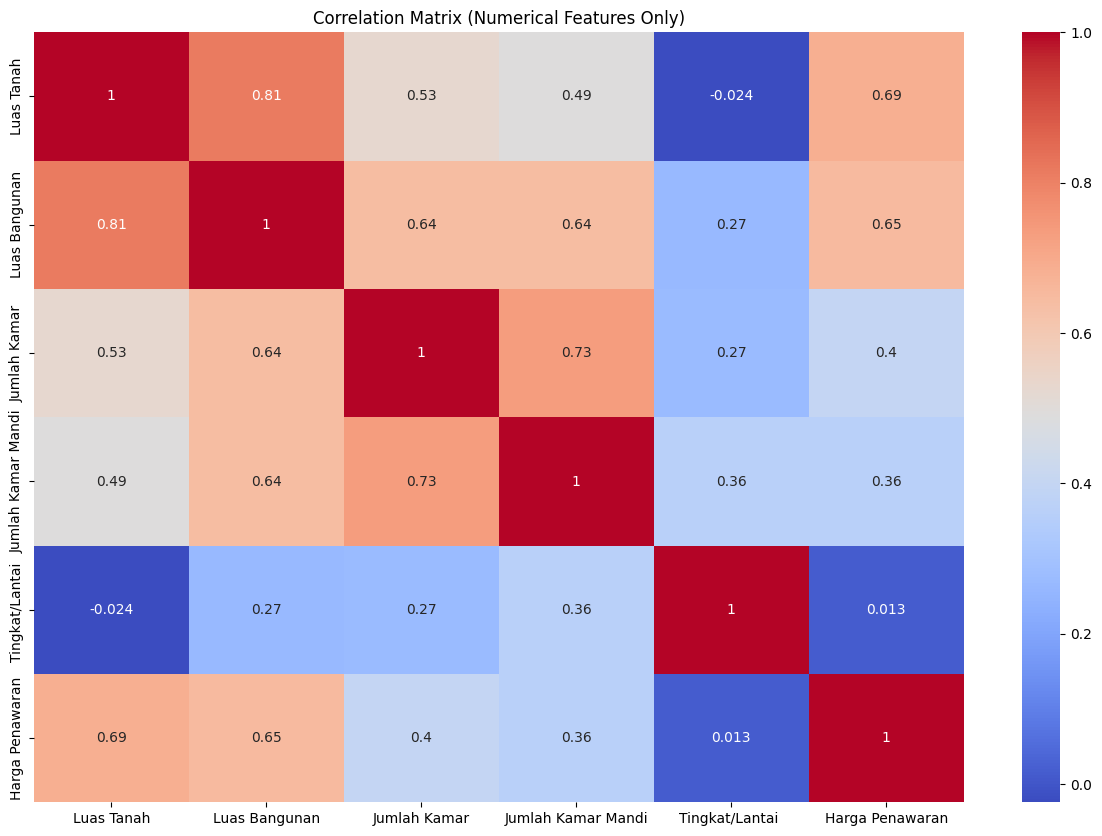

In [327]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Features Only)')
plt.show()

The dataset shows that property value (price) is most influenced by size-related attributes (land and building area), while positional or orientation attributes play a minor role. Functional design factors like number of rooms also align strongly with building size, suggesting internal layout scales proportionally with total area.

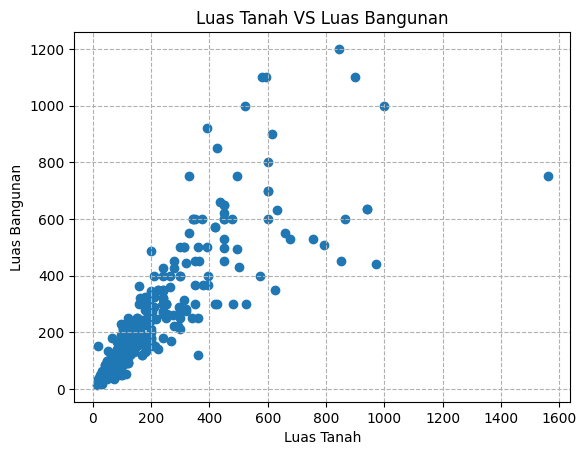

In [328]:
# Scatter plot for Luas Tanah dan Luas Bangunan
plt.scatter(df['Luas Tanah'], df['Luas Bangunan'])
plt.title('Luas Tanah VS Luas Bangunan')
plt.xlabel('Luas Tanah')
plt.ylabel('Luas Bangunan')
plt.grid(axis='both', linestyle='--')
plt.show()

Larger plots tend to host larger buildings, but the relationship is not perfectly linear. Owners of bigger land have more flexibility, leading to diverse building-to-land ratios.

## Data Preparation for Clustering

In [329]:
# Encoding categorical columns
le = LabelEncoder()
df['Nama Daerah'] = le.fit_transform(df['Nama Daerah'])
df['Area Category'] = le.fit_transform(df['Area Category'])
df['Arah Hadap Rumah'] = le.fit_transform(df['Arah Hadap Rumah'])
df['Posisi Rumah'] = le.fit_transform(df['Posisi Rumah'])
df['Lebar Jalan Depan Rumah'] = le.fit_transform(df['Lebar Jalan Depan Rumah'])
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,3,11,240,300,4,3,2,3500000000,3,2,0
1,0,100,30,60,2,1,2,287799000,3,2,1
2,3,48,170,170,5,4,2,2699999999,1,0,0
3,2,48,187,250,5,5,2,3100000000,3,2,0
4,1,48,350,600,5,5,2,5000000000,0,2,0


In [330]:
# Create a StandardScaler object
sc = StandardScaler()
df_scaled = df.copy

# Fit and transform the selected columns
df_scaled= sc.fit_transform(df[['Luas Tanah', 'Luas Bangunan', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ', 'Harga Penawaran']])

df_scaled = pd.DataFrame(df_scaled, columns=['Luas Tanah', 'Luas Bangunan', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ', 'Harga Penawaran'])
df_scaled.head()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
0,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491
1,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600
2,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901
3,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696
4,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723


In [331]:
# get stastical information on the new dataset
df_scaled.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02
mean,2.306957e-17,8.651089e-17,-1.153478e-16,2.883696e-17,1.672544e-16,-2.451142e-17
std,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00
min,-1.056864e+00,-1.187359e+00,-1.996166e+00,-1.438941e+00,-1.658248e+00,-5.850015e-01
25%,-6.499032e-01,-6.892750e-01,-7.774956e-01,-8.233942e-01,3.137225e-01,-4.355666e-01
50%,-3.198678e-01,-3.133623e-01,-1.681606e-01,-2.078471e-01,3.137225e-01,-2.789613e-01
75%,2.781662e-01,2.916222e-01,4.411744e-01,4.077000e-01,3.137225e-01,-1.477895e-02
max,6.620801e+00,4.385546e+00,5.315854e+00,5.947624e+00,4.257663e+00,1.132640e+01


## Silhouette Score

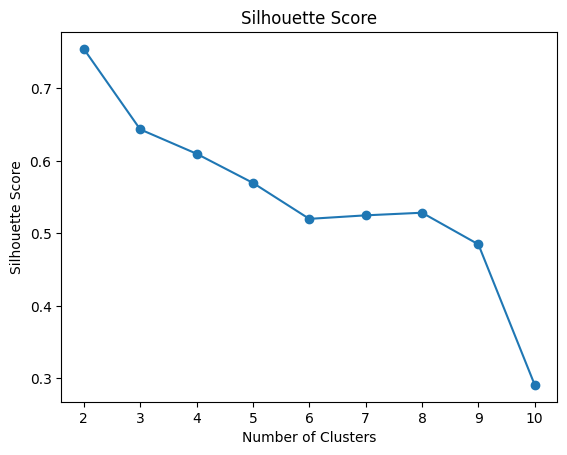

In [332]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


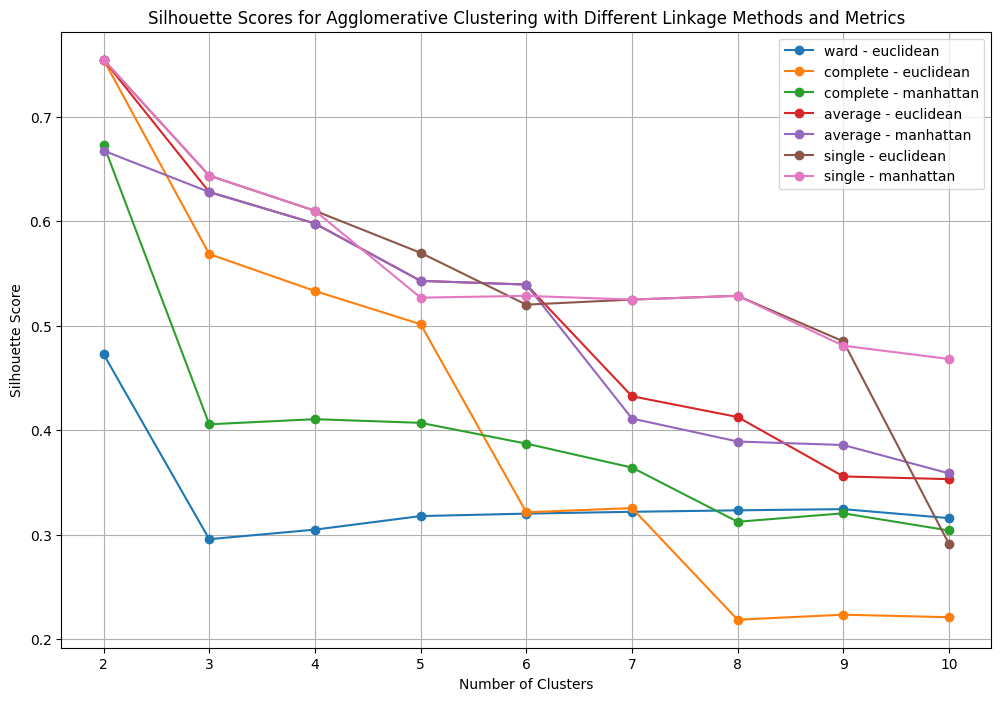

Best Silhouette Score: 0.7543687625770334
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [333]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

## Hierarchical Clustering Model

### Model 1

In [334]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc1 = agglo.fit_predict(df_scaled)

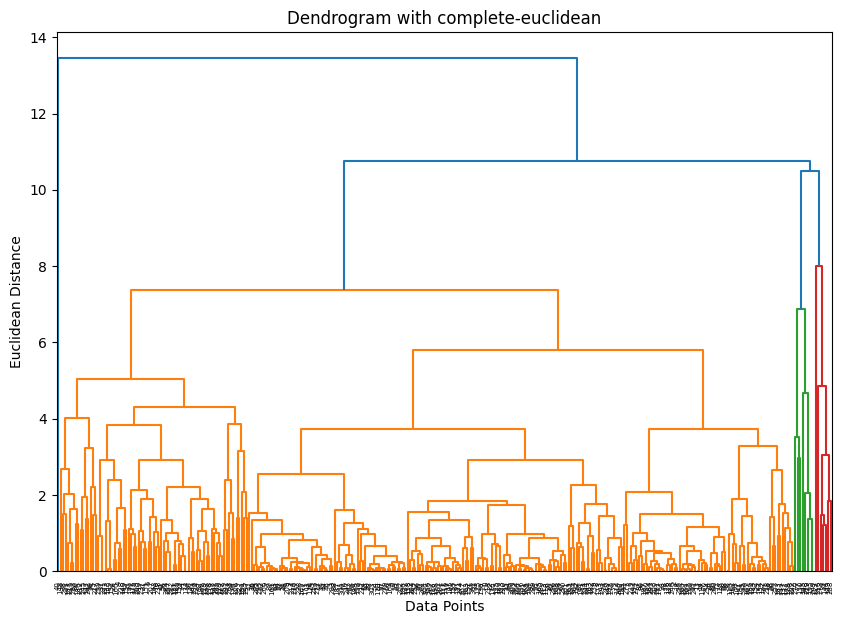

In [335]:
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [336]:
# Evaluation
ss1 = silhouette_score(df_scaled, y_hc1)
print(ss1)

0.7543687625770334


### Model 2

In [337]:
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward', metric=best_metric)
y_hc2 = agglo.fit_predict(df_scaled)

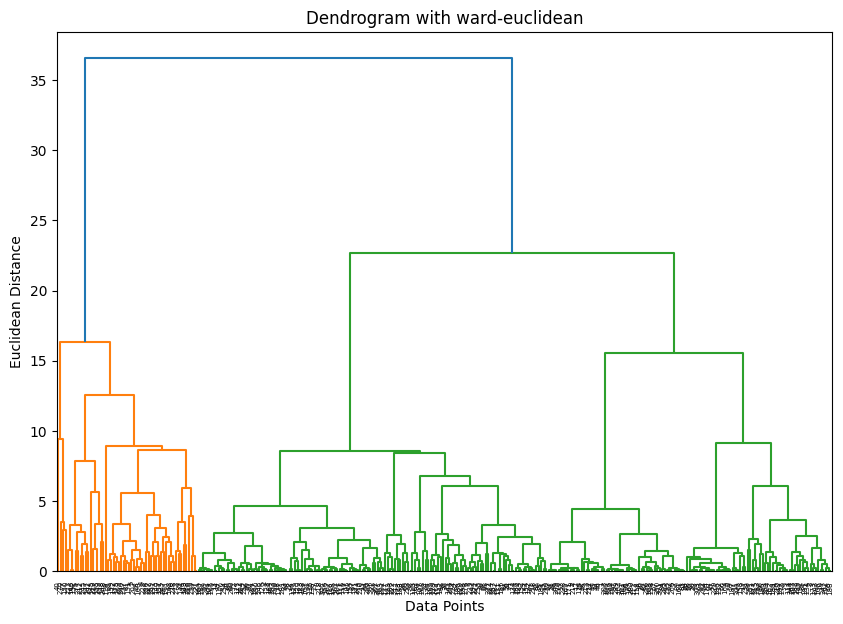

In [338]:
# Average Distance
linked = linkage(df_scaled, method='ward', metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + 'ward' + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [339]:
# Evaluation
ss2 = silhouette_score(df_scaled, y_hc2)
print(ss2)

0.4727464054343294


## Merge with the original data

In [340]:
# Add the cluster labels to the original data
df['Model1'] = y_hc1
df['Model2'] = y_hc2

# Analyze the clusters with the original values
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah,Model1,Model2
0,3,11,240,300,4,3,2,3500000000,3,2,0,0,0
1,0,100,30,60,2,1,2,287799000,3,2,1,0,0
2,3,48,170,170,5,4,2,2699999999,1,0,0,0,0
3,2,48,187,250,5,5,2,3100000000,3,2,0,0,0
4,1,48,350,600,5,5,2,5000000000,0,2,0,0,1


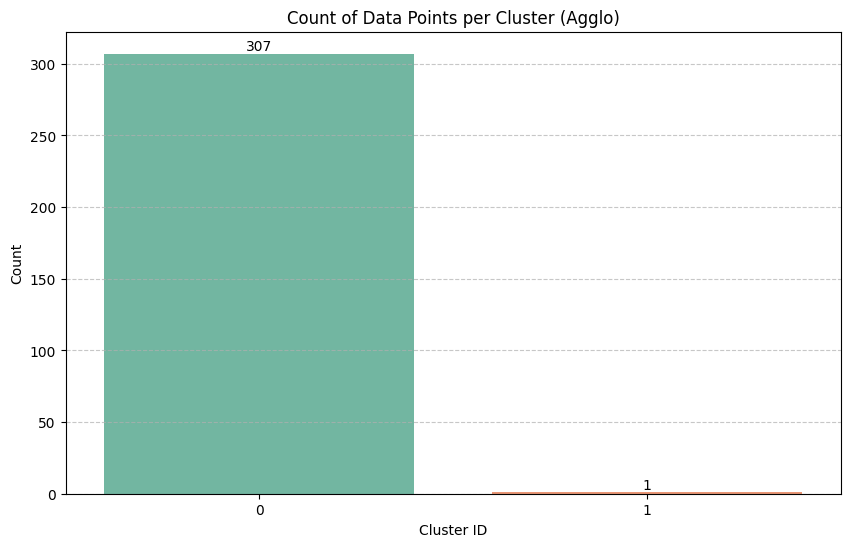

In [341]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Model1'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

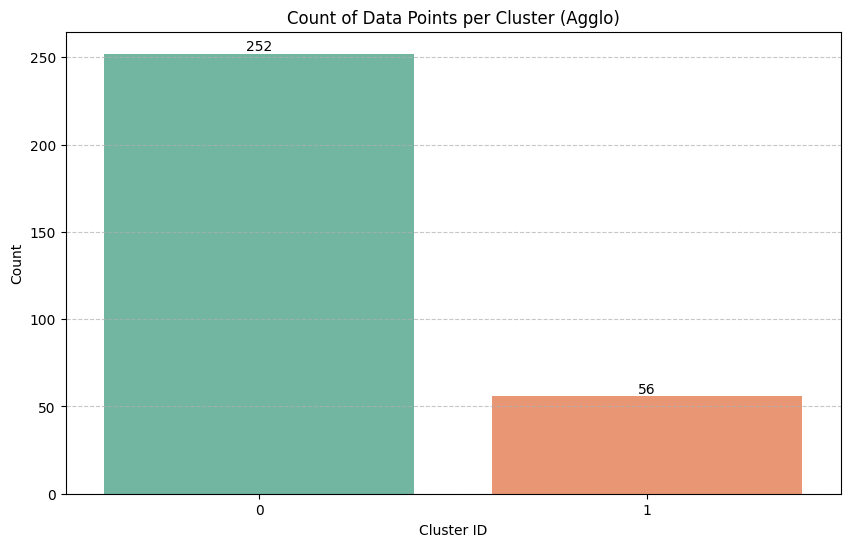

In [342]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Model2'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Statistical Summary for each cluster

In [343]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby('Model1').agg({
    'Luas Tanah': ['mean', 'std', 'min', 'max'],
    'Luas Bangunan': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar Mandi': ['mean', 'std', 'min', 'max'],
    'Tingkat/Lantai ': ['mean', 'std', 'min', 'max'],
    'Harga Penawaran': ['mean', 'std', 'min', 'max'],
    'Arah Hadap Rumah': ['first'],
    'Posisi Rumah': ['first'],
    'Lebar Jalan Depan Rumah': ['first']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
cluster_summary

Luas Tanah                        Luas Bangunan                   \
               mean         std  min   max          mean         std  min   
cluster                                                                     
0        225.736156  201.019246   14  1561    265.602606  212.655015   14   
1        600.000000         NaN  600   600    600.000000         NaN  600   

              Jumlah Kamar                   Jumlah Kamar Mandi               \
          max         mean       std min max               mean      std min   
cluster                                                                        
0        1200     4.267101  1.639083   1  13           3.332248  1.62709   1   
1         600     7.000000       NaN   7   7           5.000000      NaN   5   

            Tingkat/Lantai                    Harga Penawaran                \
        max            mean       std min max            mean           std   
cluster                                                                       
0        13        1.843648  0.506478   1   4    4.708159e+09  6.351742e+09   
1         5        1.000000       NaN   1   1    9.900000e+10           NaN   

                                  Arah Hadap Rumah Posisi Rumah  \
                 min          max             mode         mode   
cluster                                                           
0          160000000  58000000000                3            2   
1        99000000000  99000000000                0            2   

        Lebar Jalan Depan Rumah  
                           mode  
cluster                          
0                             0  
1                             0

In [344]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby('Model2').agg({
    'Luas Tanah': ['mean', 'std', 'min', 'max'],
    'Luas Bangunan': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar Mandi': ['mean', 'std', 'min', 'max'],
    'Harga Penawaran': ['mean', 'std', 'min', 'max'],
    'Arah Hadap Rumah': ['first'],
    'Posisi Rumah': ['first'],
    'Lebar Jalan Depan Rumah': ['first']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
cluster_summary

Luas Tanah                        Luas Bangunan                   \
               mean         std  min   max          mean         std  min   
cluster                                                                     
0        155.857143   93.265992   14   525    187.904762  106.842173   14   
1        546.875000  245.541632  240  1561    621.214286  212.411240  300   

              Jumlah Kamar                   Jumlah Kamar Mandi                \
          max         mean       std min max               mean       std min   
cluster                                                                         
0         570     3.853175  1.341295   1   9           2.912698  1.246636   1   
1        1200     6.178571  1.538679   3  13           5.250000  1.770978   2   

            Harga Penawaran                                         \
        max            mean           std         min          max   
cluster                                                              
0         7    2.628531e+09  2.046885e+09   160000000  13500000000   
1        13    1.575027e+10  1.493437e+10  2750000000  99000000000   

        Arah Hadap Rumah Posisi Rumah Lebar Jalan Depan Rumah  
                    mode         mode                    mode  
cluster                                                        
0                      3            2                       0  
1                      0            2                       0

## Model 1
## **Cluster 0 (n=307) — Properti Menengah, Pasar Utama**

Profil: Luas tanah & bangunan moderat, harga dalam kisaran rata-rata pasar, jumlah kamar & lantai wajar.

Makna: Ini adalah segmen pasar utama — mayoritas properti berada dalam kategori ini. Permintaan tinggi, tapi persaingan juga ketat.

Strategi:
* Fokus pada efisiensi biaya dan harga kompetitif.
* Gunakan promosi massal di marketplace dan media digital.
* Tawarkan paket promosi atau bonus fitur tambahan (misal, free kitchen set).

Fokus KPI: Volume penjualan, tingkat okupansi listing, conversion rate.

##**Cluster 1 (n=1) — Properti Premium, Segmen Eksklusif**

Profil: Properti dengan harga, luas tanah, atau bangunan jauh di atas rata-rata; kemungkinan rumah mewah atau komersial di lokasi strategis.

Makna: Segmen niche (mewah) — pembeli terbatas, tetapi nilai transaksi tinggi.

Strategi:
* Gunakan personal selling dan branding eksklusif.
* Tawarkan layanan konsultasi pribadi dan tur virtual eksklusif.
* Bangun kolaborasi dengan investor atau agen properti premium.

Fokus KPI: Average Selling Price (ASP), waktu penjualan (Days on Market), nilai total transaksi.

<br>
Rekomendasi Umum

Segmentasi Produk:
* Cluster 0 → Fokus pada properti menengah (mainstream housing).
* Cluster 1 → Properti eksklusif (high-end, luxury).

Strategi Harga & Promosi:
* Cluster 0: Strategi harga kompetitif dan promosi diskon moderat.
* Cluster 1: Strategi premium pricing dengan nilai tambah (lokasi, fasilitas, citra).

Strategi Komunikasi:
* Cluster 0: Gunakan media digital massal (website properti, marketplace, media sosial).
* Cluster 1: Gunakan pendekatan personal seperti private showing, event eksklusif, atau jaringan investor.

Monitoring:
* Evaluasi ulang cluster setiap 6 bulan untuk mendeteksi munculnya segmen baru (misal affordable housing).
* Pantau tren harga dan preferensi pembeli — potensi pergeseran dari properti menengah ke premium atau sebaliknya.

## Model 2
##**Cluster 0 (n=252) — Properti Menengah, Pasar Utama**

Profil:
Properti dengan luas tanah dan bangunan sedang, harga berada dalam kisaran rata-rata pasar. Umumnya memiliki jumlah kamar tidur dan kamar mandi yang wajar (2–3 kamar), serta berada di area permukiman umum.

Makna:
Ini adalah segmen pasar utama dan paling besar. Menunjukkan bahwa mayoritas properti di pasar berada pada kategori menengah yang menjadi fokus utama pembeli rumah pertama dan keluarga muda. Persaingan tinggi tetapi juga stabil karena permintaan berkelanjutan.

Strategi:
* Fokus pada efisiensi biaya dan penawaran harga kompetitif.
* Gunakan strategi promosi massal melalui marketplace properti, media sosial, dan iklan digital.
* Tawarkan promo tambahan seperti diskon biaya notaris atau furnitur gratis.
* Pastikan proses transaksi cepat dan transparan untuk menarik pembeli.

Fokus KPI: Volume penjualan, conversion rate, jumlah listing aktif, tingkat penutupan transaksi.

##**Cluster 1 (n=56) — Properti Premium, Segmen Eksklusif**

Profil:
Properti dengan harga tinggi, luas tanah dan bangunan jauh di atas rata-rata. Kemungkinan merupakan rumah mewah, vila, atau bangunan komersial di lokasi strategis (pusat kota atau kawasan elit).

Makna:
Segmen pasar eksklusif dengan pembeli yang lebih selektif dan fokus pada kualitas serta prestise. Meskipun jumlahnya kecil, nilai transaksi per unit sangat tinggi, memberikan kontribusi besar terhadap total pendapatan.

Strategi:
* Terapkan premium pricing strategy dengan penekanan pada nilai tambah (lokasi, desain arsitektur, fasilitas).
* Gunakan branding eksklusif dan pemasaran personal (private showing, event tertutup, kerja sama dengan agen premium).
* Kembangkan layanan konsultasi properti dan pengalaman pembelian yang personal.
* Bangun jaringan dengan investor dan pengembang properti kelas atas.

Fokus KPI: Average Selling Price (ASP), Days on Market (DOM), total nilai transaksi, tingkat kepuasan pelanggan premium.

Rekomendasi Umum

Segmentasi Produk:
* Cluster 0 → Properti menengah untuk pasar massal (mainstream housing).
* Cluster 1 → Properti eksklusif dan mewah (luxury housing atau investasi komersial).

Strategi Harga & Promosi:
* Cluster 0: Harga kompetitif dengan promosi diskon atau paket bundling.
* Cluster 1: Harga premium dengan penekanan pada nilai dan status sosial.

Strategi Komunikasi:
* Cluster 0: Gunakan media digital massal seperti marketplace (Rumah123, OLX, dll.) dan media sosial.
* Cluster 1: Gunakan pendekatan personal melalui undangan eksklusif, media premium, dan jaringan profesional.

Monitoring:
* Lakukan evaluasi ulang hasil clustering setiap 6 bulan untuk memantau perubahan tren harga dan preferensi pembeli.
* Analisis potensi munculnya segmen baru seperti affordable housing atau eco-living cluster.